In [79]:
import pandas as pd
from Testmodule import 資產負債表, 綜合損益表
from datetime import date

# 年度
current_date = date.today()
user_year = current_date.year

# 上一季資料
current_quarter = (current_date.month - 1) // 3 + 1
user_quarter = current_quarter - 1 
if user_quarter == 1:
    user_quarter = 4
    user_year -= 1  #如果是第一季，user_year改為上個年度

# user_year = int(input('請輸入西元年份'))
# user_quarter = int(input('請輸入上個季度'))

data1 = 綜合損益表.綜合損益表by季(user_year, user_quarter)
data2 = 資產負債表.資產負債表by季(user_year, user_quarter)

resultdf=data1.merge(data2,on='Key',how='inner') #兩張table都有獨立的key，利用這兩個key值將兩張table結合

project = {}
project['公司代號'] = resultdf['公司 代號_x']
project['公司名稱'] = resultdf['公司名稱_x']
project['年度'] = resultdf['年度_x'] 
project['季別'] = resultdf['季別_x']
project['基本每股盈餘_EPS'] = resultdf['基本每股盈餘（元）'] #EPS
project['營業收入'] = resultdf['營業收入']
project['權益總計'] = resultdf['權益總計'] #股東權益
project['資產總計'] = resultdf['資產總計'] #資產總額
project['淨利'] = resultdf['本期綜合損益總額'] #淨利


project = pd.DataFrame(project)

#test

/Users/lai/Documents/GitHub/ccClub/Project/Testmodule/綜合損益表.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(res.text)[3]
/Users/lai/Documents/GitHub/ccClub/Project/Testmodule/綜合損益表.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(res.text)[3]
/Users/lai/Documents/GitHub/ccClub/Project/Testmodule/綜合損益表.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(res.text)[3]
/Users/lai/Documents/GitHub/ccClub/Project/Testmodule/綜合損益表.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a liter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29151 (\N{CJK UNIFIED IDEOGRAPH-71DF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26989 (\N{CJK UNIFIED IDEOGRAPH-696D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


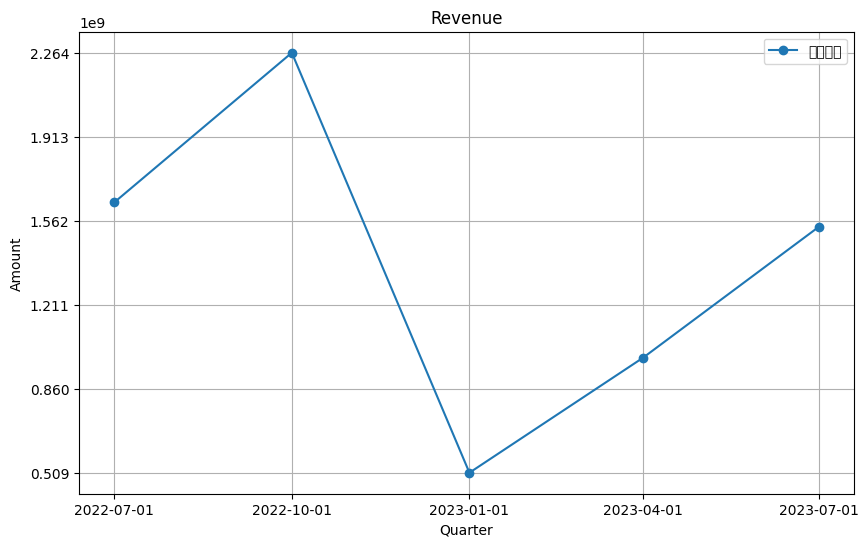

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# 先將project的年度、季別合併，變成date的形式後排序，之後繪圖座標軸才會正確
project['Date'] = (project['年度'] + 1911).astype(str)+ (project['季別']*3-2).astype(str)
project['Date'] = pd.to_datetime(project['Date'], format='%Y%m')

project = project.sort_values(by='Date')
project = pd.DataFrame(project)


def plot_company_data(company_code):

    company_data = project[project['公司代號'] == company_code]
    plt.figure(figsize=(10, 6))
    plt.plot(company_data['Date'], company_data['營業收入'], label='營業收入', marker='o')
    plt.title('Revenue')
    
    # 設定 x 軸刻度為 Quarter
    plt.xticks(company_data['Date'].unique())
    
    # 設定 y 軸刻度平均分成 5 等份
    min_value = company_data['營業收入'].min()
    max_value = company_data['營業收入'].max()
    tick_interval = (max_value - min_value) / 5
    plt.yticks([min_value + i * tick_interval for i in range(6)])
    
    plt.xlabel('Quarter')
    plt.ylabel('Amount')
    plt.legend()
    plt.grid(True)
    plt.show()

company_code = int(input('輸入公司代號'))
plot_company_data(company_code)